In [1]:
import scipy.stats as stats
from scipy.stats import zscore
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, binarize
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.metrics import roc_curve,roc_auc_score, mean_squared_error,accuracy_score,classification_report,cluster,confusion_matrix, cohen_kappa_score
from scipy.stats import shapiro , levene , mannwhitneyu , chi2_contingency , chisquare
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from warnings import filterwarnings

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
df = pd.read_csv("Indian Liver Patient Dataset (ILPD).csv",names=['Age','Gender','TB','DB','Alkphos','Sgpt','Sgot','TP','ALB','A/G','Selector'])
feature_cols = ['age', 'sex', 'total_bilirubin', 'direct_bilirubin', 'alkaline', 'alamine','aspartate', 'total_protein', 'albumin', 'A/G Ratio','Selector']
df.head()

,Age,Gender,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A/G,Selector
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [3]:
df.loc[df["Selector"]==2,"Selector"]=0
df_D=df[df.duplicated(keep = False)]
df = df[~df.duplicated(subset = None, keep = 'first')]

In [4]:
df.shape

(570, 11)

In [5]:
df.groupby('Selector').size()

Selector
0    164
1    406
dtype: int64

In [6]:
df.isnull().sum()

Age         0
Gender      0
TB          0
DB          0
Alkphos     0
Sgpt        0
Sgot        0
TP          0
ALB         0
A/G         4
Selector    0
dtype: int64

In [7]:
df.dropna(inplace=True)

In [8]:
df.shape

(566, 11)

In [9]:
df.isnull().sum()

Age         0
Gender      0
TB          0
DB          0
Alkphos     0
Sgpt        0
Sgot        0
TP          0
ALB         0
A/G         0
Selector    0
dtype: int64

In [10]:
df.describe(include = 'all')

,Age,Gender,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A/G,Selector
count,566.000000,566,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,428,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,44.886926,NaN,3.338869,1.505830,292.567138,80.143110,109.892226,6.494876,3.145583,0.948004,0.713781
std,16.274893,NaN,6.286728,2.841485,245.936559,182.044881,291.841897,1.087512,0.795745,0.319635,0.452393
min,4.000000,NaN,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,0.000000
25%,33.000000,NaN,0.800000,0.200000,176.000000,23.000000,25.000000,5.800000,2.600000,0.700000,0.000000
50%,45.000000,NaN,1.000000,0.300000,208.000000,35.000000,41.000000,6.600000,3.100000,0.950000,1.000000
75%,58.000000,NaN,2.600000,1.300000,298.000000,60.750000,87.000000,7.200000,3.800000,1.100000,1.000000


/home/nick/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa8eccfdf90>,
      dtype=object)

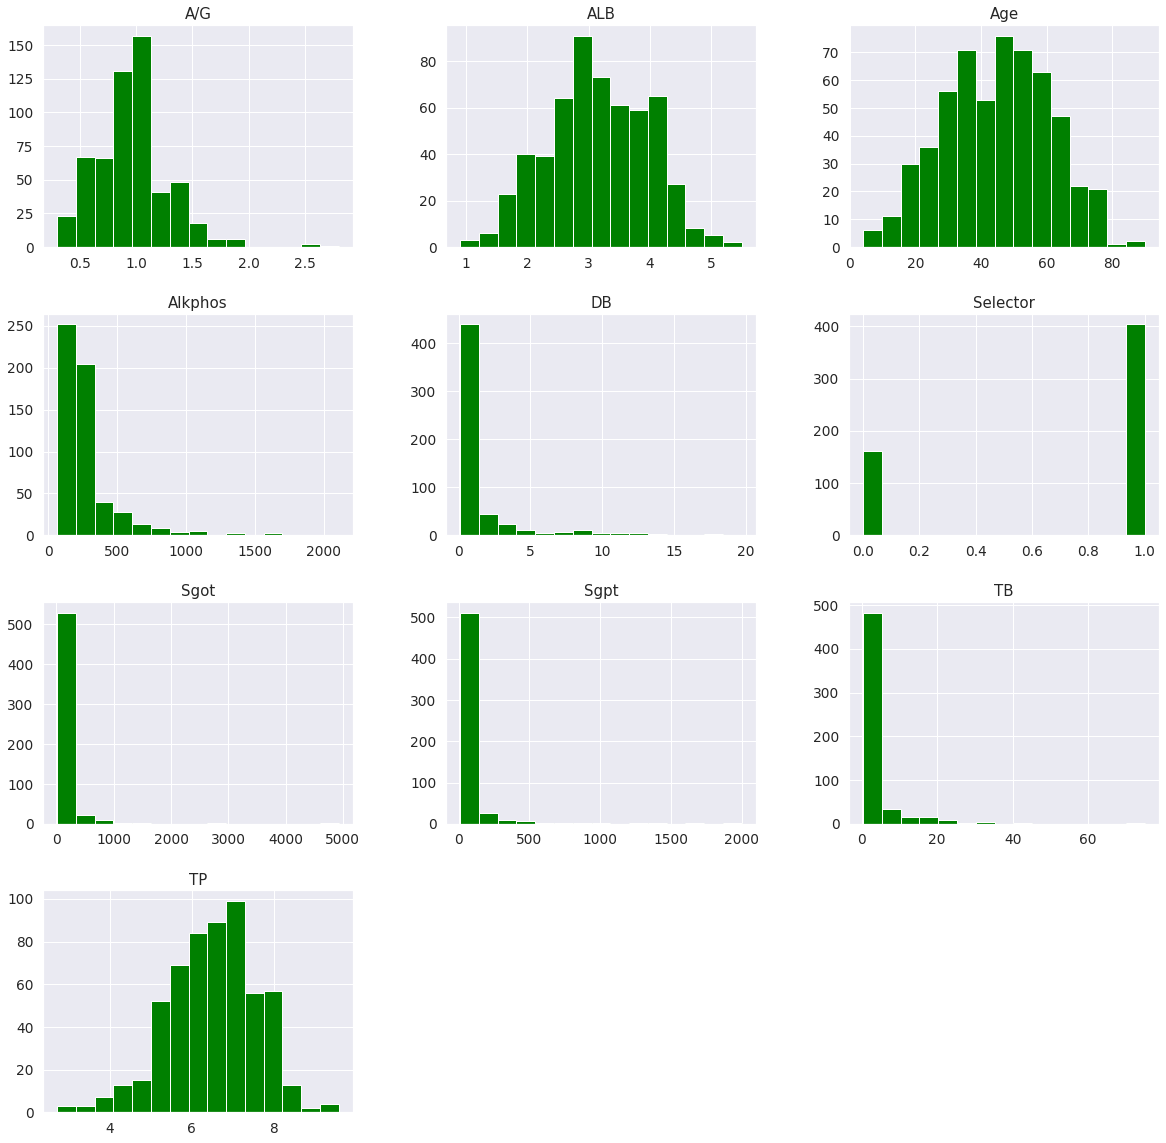

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from matplotlib.ticker import StrMethodFormatter
fig = plt.figure(figsize = (20,20))
sns.set(font_scale=1.25)
ax = fig.gca()
df.hist(ax=ax,color="green",edgecolor="white", bins=15)

In [12]:
categorical = list ( df.select_dtypes ( include = "object" ).columns )
print ( "Categorical features:\n" , categorical )
print ( "\n" )
numerical = list ( df.select_dtypes ( exclude = "object" ).columns )
print ( "Continuous features:\n" , numerical )

Categorical features:
 ['Gender']


Continuous features:
 ['Age', 'TB', 'DB', 'Alkphos', 'Sgpt', 'Sgot', 'TP', 'ALB', 'A/G', 'Selector']


Column: Gender


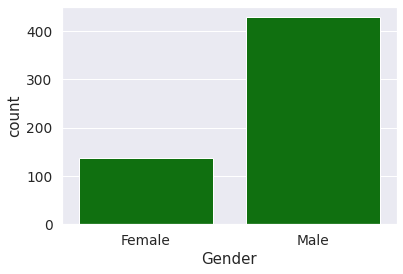

Male      428
Female    138
Name: Gender, dtype: int64
Male 	 75.62 %
Female 	 24.38 %




In [13]:
for i in categorical:
    print ( "Column:" , i )
    sns.countplot(df[i],color="green")
    plt.show()
    print ( df [ i ].value_counts ( ) ) 
    d = df [ i ].value_counts ( )
    j = 0
    for i in d.index:
        print ( i , "\t" , round ( ( ( d [ j ] / df.shape [ 0 ] ) * 100  ) , 2 ) , "%" )
        j += 1
    
    print ( "\n" )


# TP

In [14]:
df.groupby('TP').size()
TP=df[ df['TP'] >= 8 ]
observed=pd.crosstab(TP["TP"],TP["Selector"],margins=True,)
observed

TP_OUT=TP[ TP["Selector"]==0]
TP_OUT

,Age,Gender,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A/G,Selector
56,33,Male,0.8,0.2,198,26,23,8.0,4.0,1.0,0
240,48,Male,0.7,0.2,165,32,30,8.0,4.0,1.0,0
265,4,Male,0.9,0.2,348,30,34,8.0,4.0,1.0,0
275,26,Male,1.9,0.8,180,22,19,8.2,4.1,1.0,0
287,43,Male,1.3,0.6,155,15,20,8.0,4.0,1.0,0
300,58,Male,0.8,0.2,180,32,25,8.2,4.4,1.1,0
303,50,Male,0.7,0.2,206,18,17,8.4,4.2,1.0,0
319,14,Male,0.9,0.3,310,21,16,8.1,4.2,1.0,0
326,36,Female,1.2,0.4,358,160,90,8.3,4.4,1.1,0
344,37,Male,0.8,0.2,195,60,40,8.2,5.0,1.5,0


# Alkphos

In [25]:
df=df[ df['Alkphos'] <= 1000 ]
df=df[ df['Alkphos'] <= 1000 ]
Alkphos=df[ df['Alkphos'] >= 400 ]
observed=pd.crosstab(Alkphos["Alkphos"],Alkphos["Selector"],margins=True,)
observed

Alkphos_OUT=Alkphos[ Alkphos["Selector"]==0]
Alkphos_OUT

,Age,Gender,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A/G,Selector
33,38,Female,2.6,1.2,410,59,57,5.6,3.0,0.80,0
42,42,Male,6.8,3.2,630,25,47,6.1,2.3,0.60,0
109,36,Male,0.9,0.1,486,25,34,5.9,2.8,0.90,0
114,50,Male,5.8,3.0,661,181,285,5.7,2.3,0.67,0
271,4,Male,0.8,0.2,460,152,231,6.5,3.2,0.90,0
366,16,Male,0.7,0.2,418,28,35,7.2,4.1,1.30,0
411,23,Female,2.3,0.8,509,28,44,6.9,2.9,0.70,0
417,11,Male,0.7,0.1,592,26,29,7.1,4.2,1.40,0
539,65,Female,0.7,0.2,406,24,45,7.2,3.5,0.90,0
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,0


# DB

In [18]:
df.groupby('DB').size()
#DB=df[ df['TB'] >= 21]
DB=df[ df['DB'] >= 5]
observed=pd.crosstab(DB["DB"],DB["Selector"],margins=True,)
observed

DB_OUT=DB[ DB["Selector"]==0]
DB_OUT

,Age,Gender,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A/G,Selector


In [19]:
TB=df[ df['TB'] >= 21]
observed=pd.crosstab(TB["TB"],TB["Selector"],margins=True,)
observed

TB_OUT=TB[ TB["Selector"]==0]
TB_OUT

,Age,Gender,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A/G,Selector


# sgot

In [108]:
sgot=df[ df['Sgot'] >= 51]
observed=pd.crosstab(sgot["Sgot"],sgot["Selector"],margins=True,)
observed

sgot_OUT=sgot[ sgot["Selector"]==0]
sgot_OUT

,Age,Gender,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A/G,Selector
12,64,Male,0.9,0.3,310,61,58,7.0,3.4,0.90,0
15,25,Male,0.6,0.1,183,91,53,5.5,2.3,0.70,0
33,38,Female,2.6,1.2,410,59,57,5.6,3.0,0.80,0
34,38,Female,2.6,1.2,410,59,57,5.6,3.0,0.80,0
41,62,Male,0.6,0.1,160,42,110,4.9,2.6,1.10,0
45,35,Male,1.8,0.6,275,48,178,6.5,3.2,0.90,0
57,48,Female,0.9,0.2,175,24,54,5.5,2.7,0.90,0
86,13,Male,0.6,0.1,320,28,56,7.2,3.6,1.00,0
105,36,Male,5.3,2.3,145,32,92,5.1,2.6,1.00,0
106,36,Male,5.3,2.3,145,32,92,5.1,2.6,1.00,0


# Sgpt

In [107]:
Sgpt=df[ df['Sgpt'] >= 56]
observed=pd.crosstab(Sgpt["Sgpt"],Sgpt["Selector"],margins=True,)
observed

Sgpt_OUT=Sgpt[ Sgpt["Selector"]==0]
Sgpt_OUT

,Age,Gender,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A/G,Selector
12,64,Male,0.9,0.3,310,61,58,7.0,3.4,0.90,0
15,25,Male,0.6,0.1,183,91,53,5.5,2.3,0.70,0
33,38,Female,2.6,1.2,410,59,57,5.6,3.0,0.80,0
34,38,Female,2.6,1.2,410,59,57,5.6,3.0,0.80,0
112,27,Male,1.2,0.4,179,63,39,6.1,3.3,1.10,0
114,50,Male,5.8,3.0,661,181,285,5.7,2.3,0.67,0
115,50,Male,7.3,3.6,1580,88,64,5.6,2.3,0.60,0
122,58,Male,1.7,0.8,188,60,84,5.9,3.5,1.40,0
185,38,Male,1.5,0.4,298,60,103,6.0,3.0,1.00,0
212,22,Male,2.7,1.0,160,82,127,5.5,3.1,1.20,0


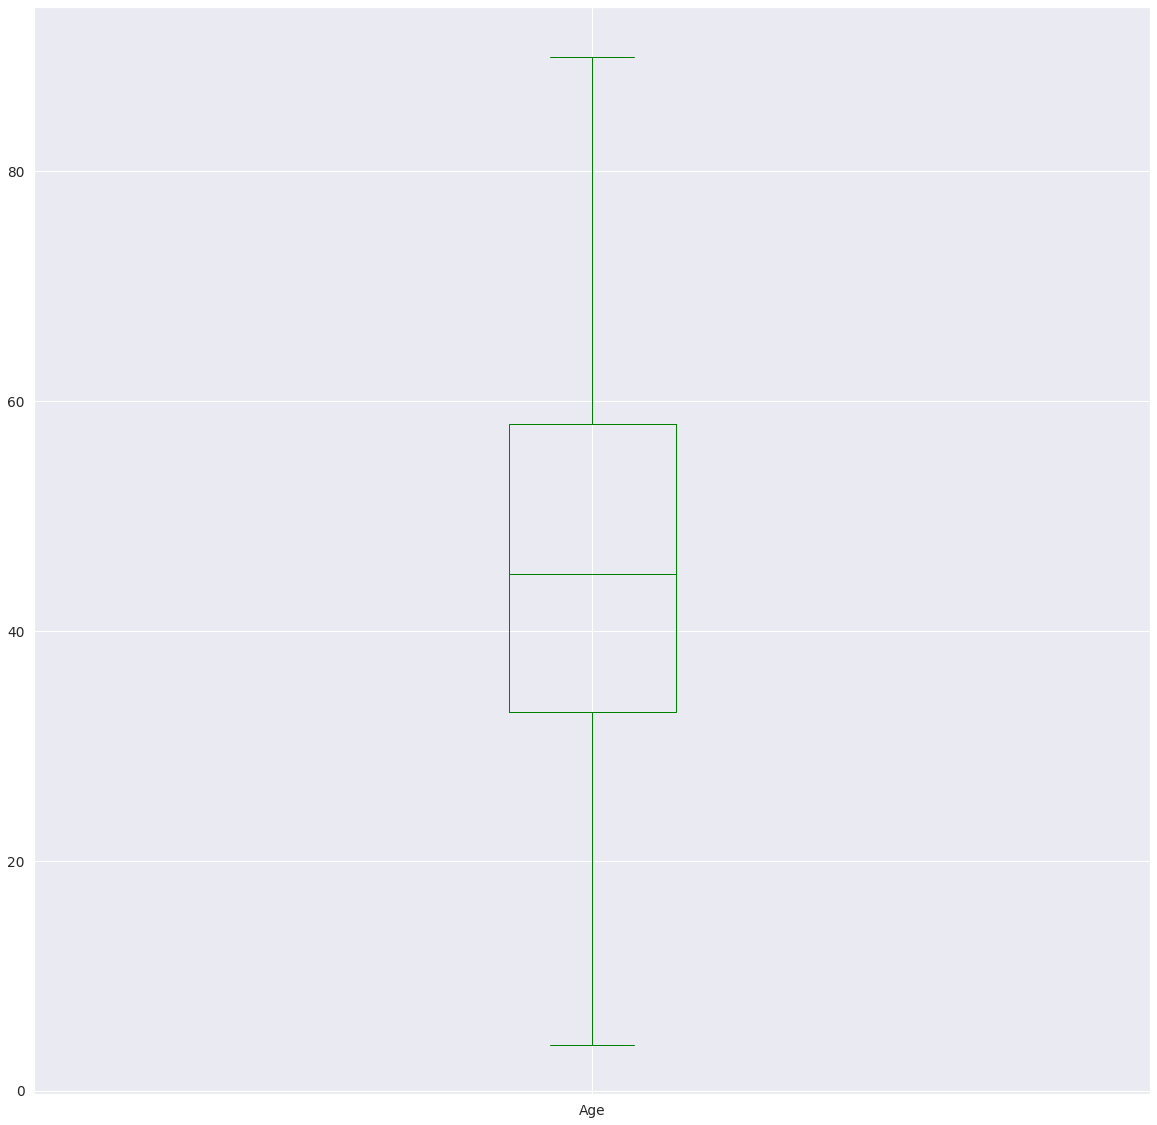

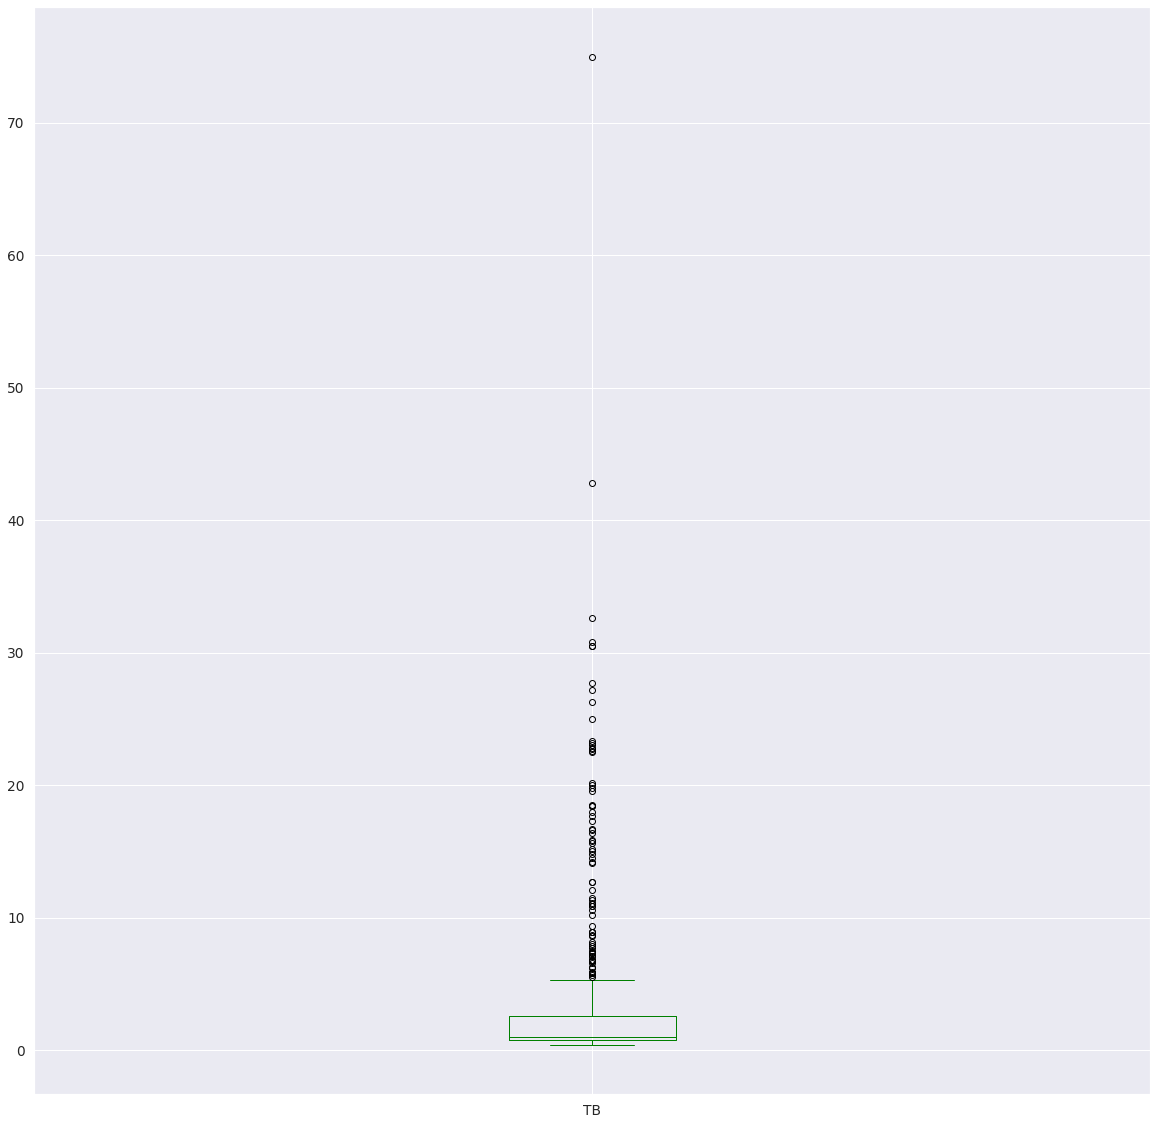

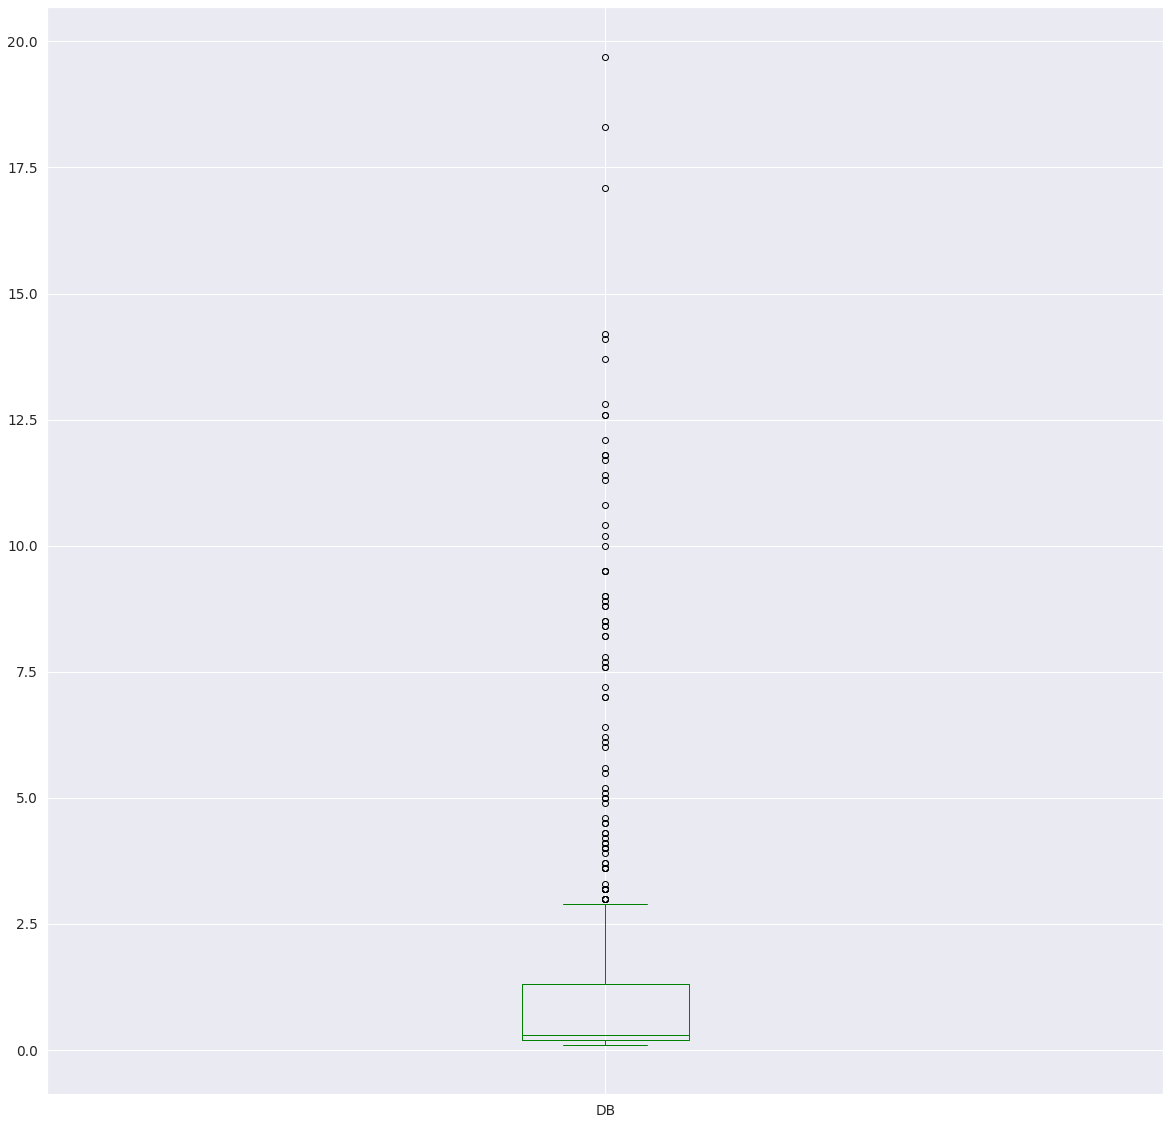

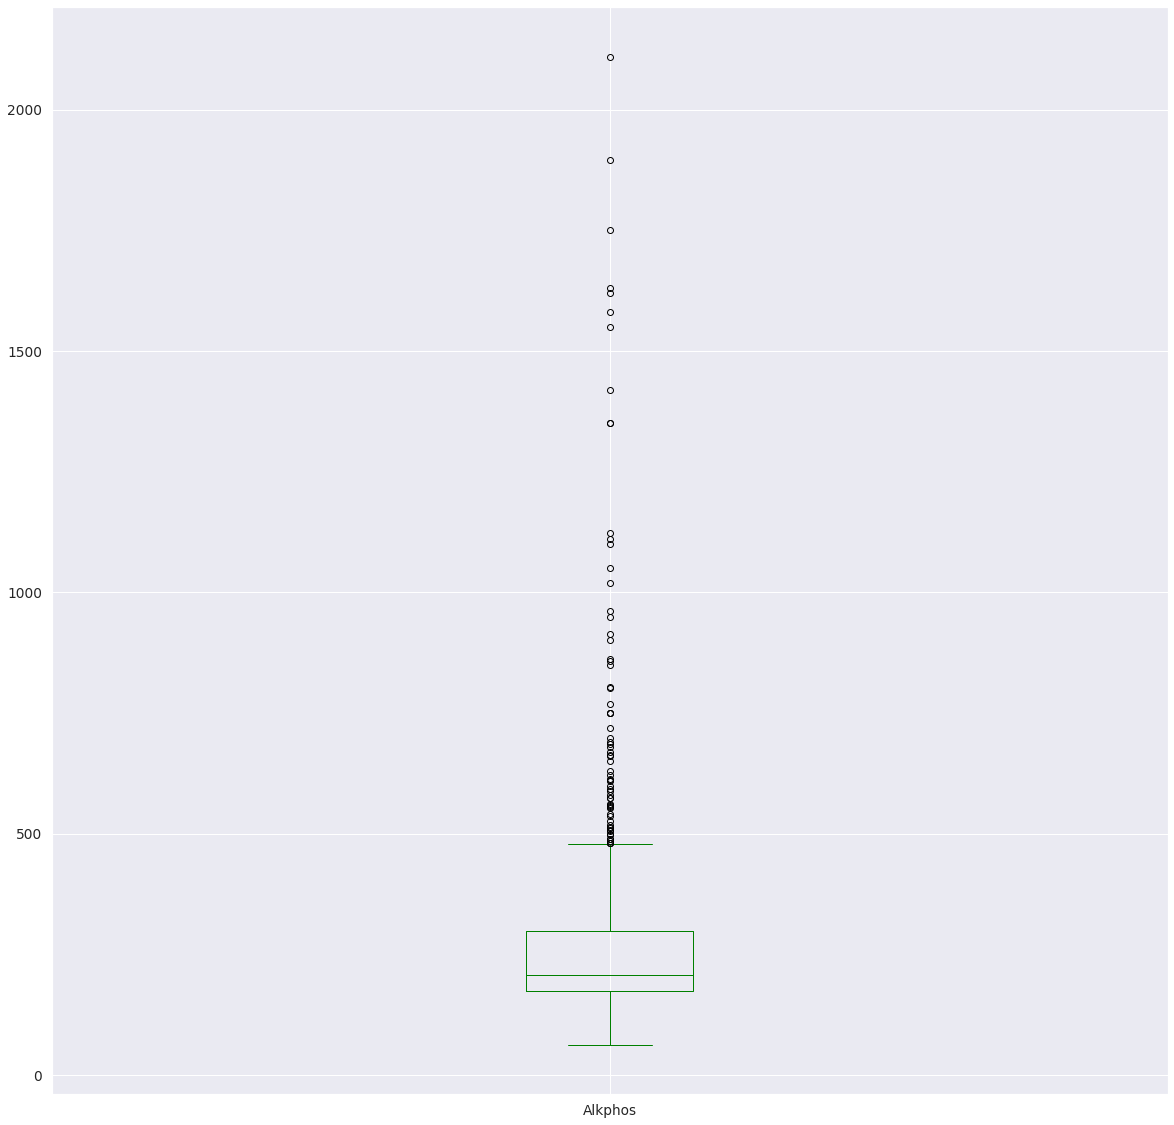

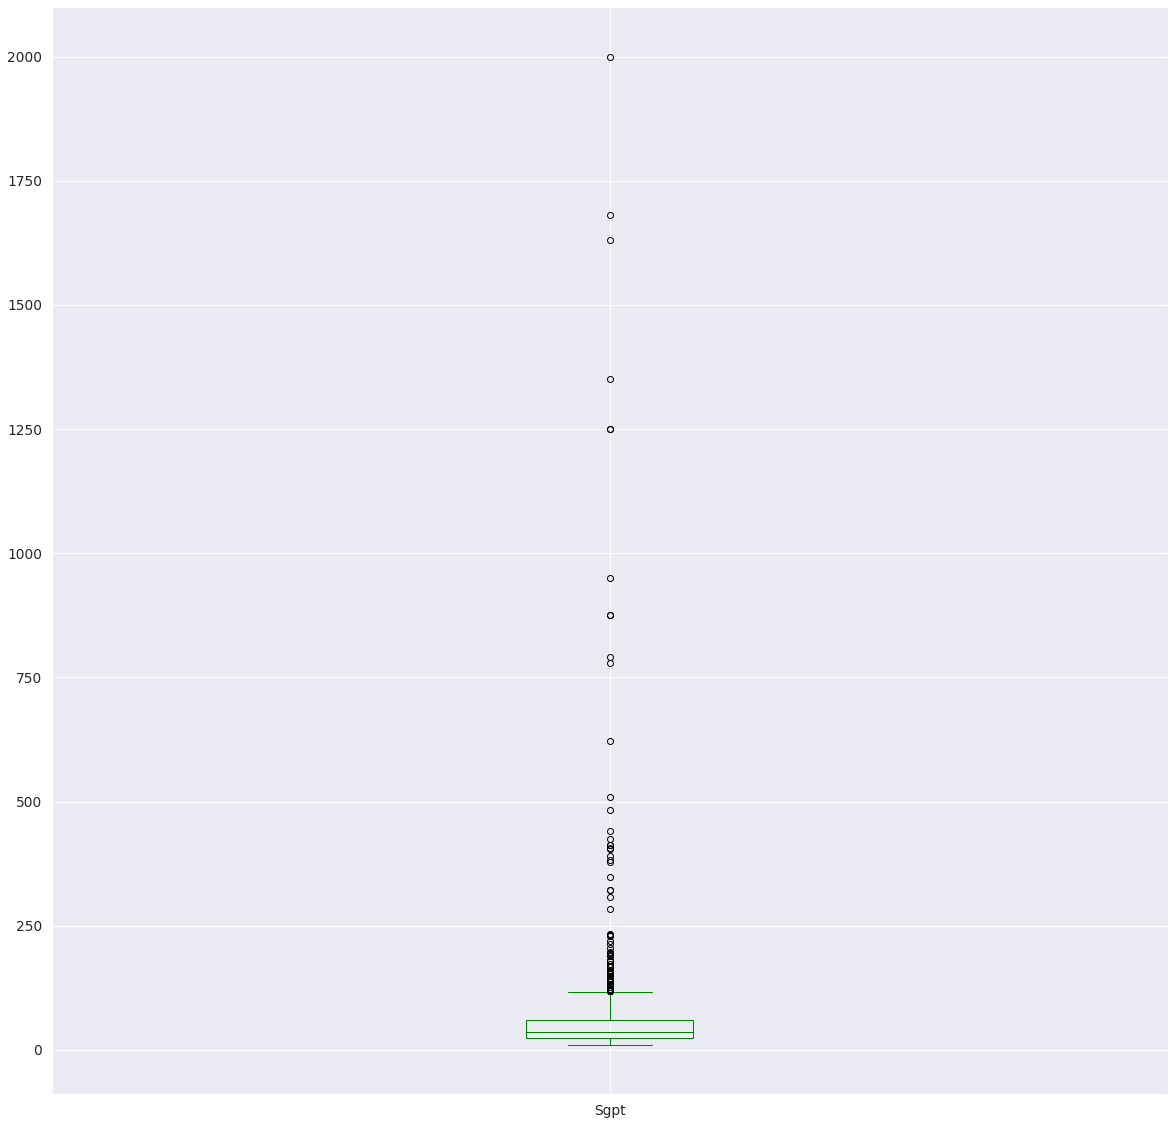

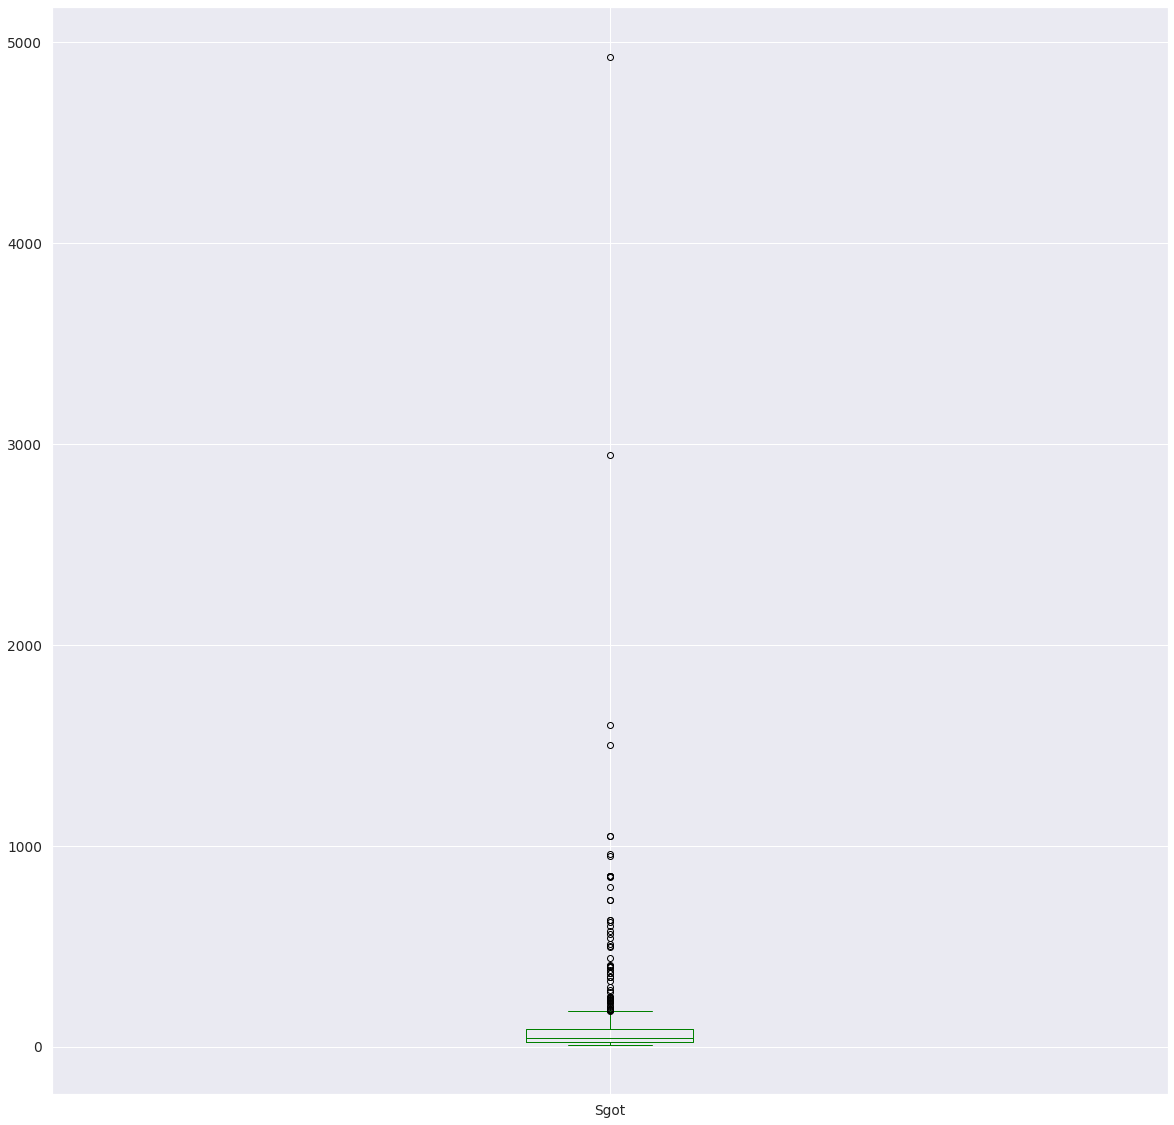

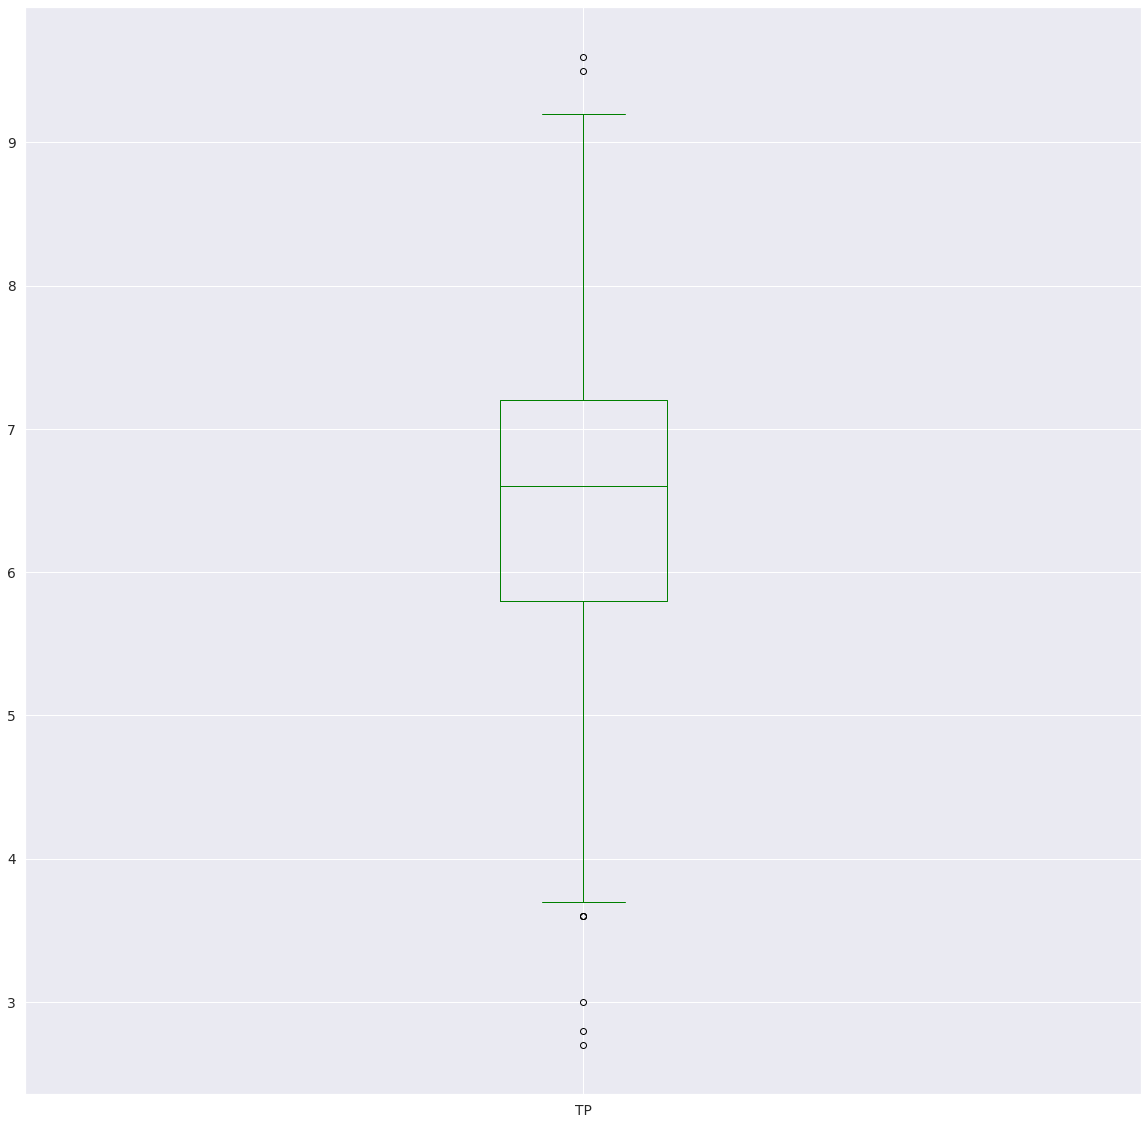

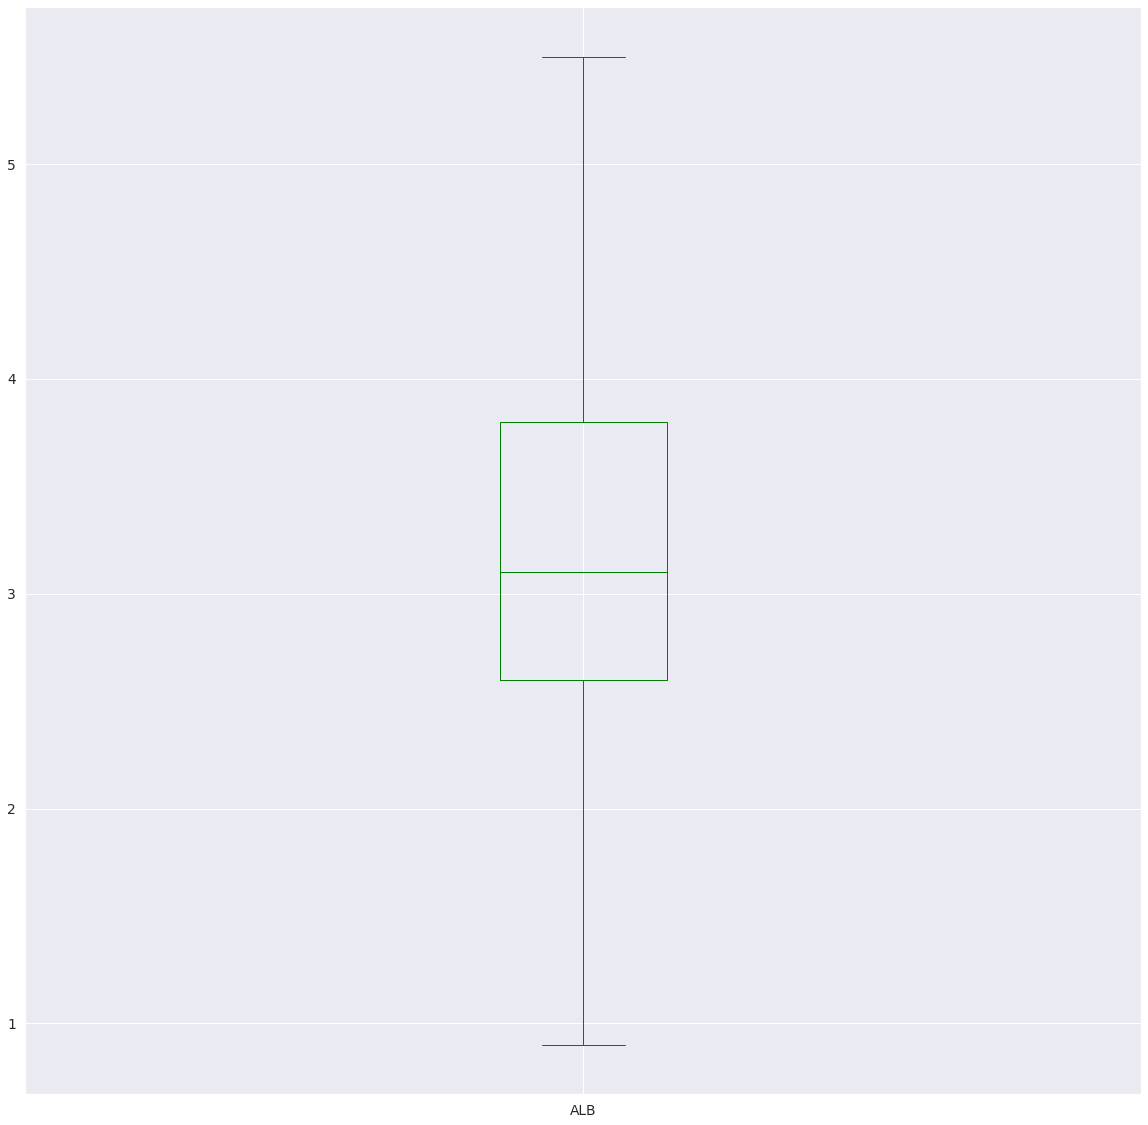

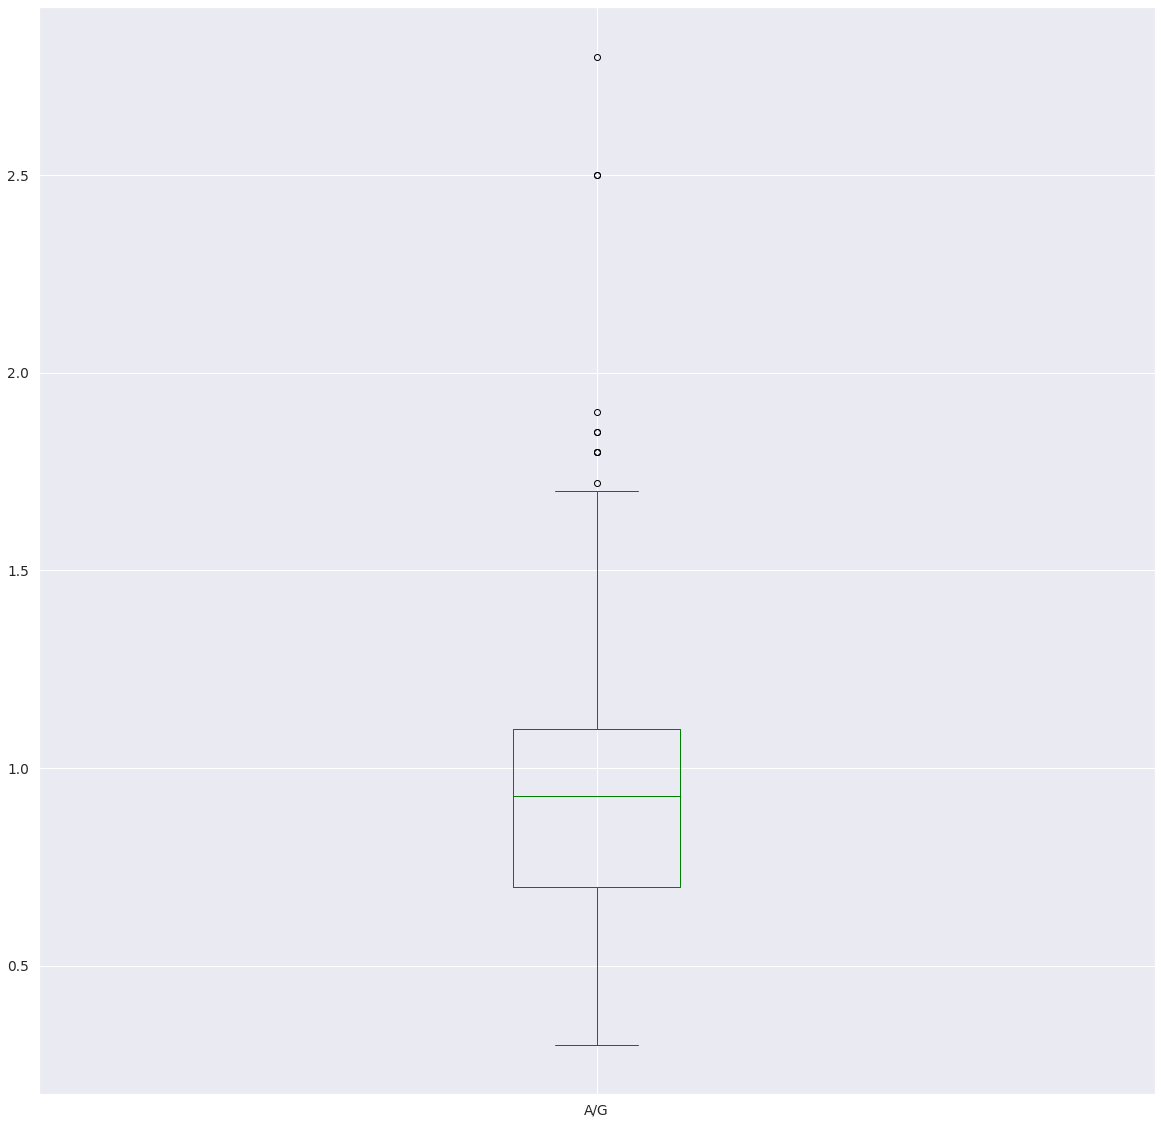

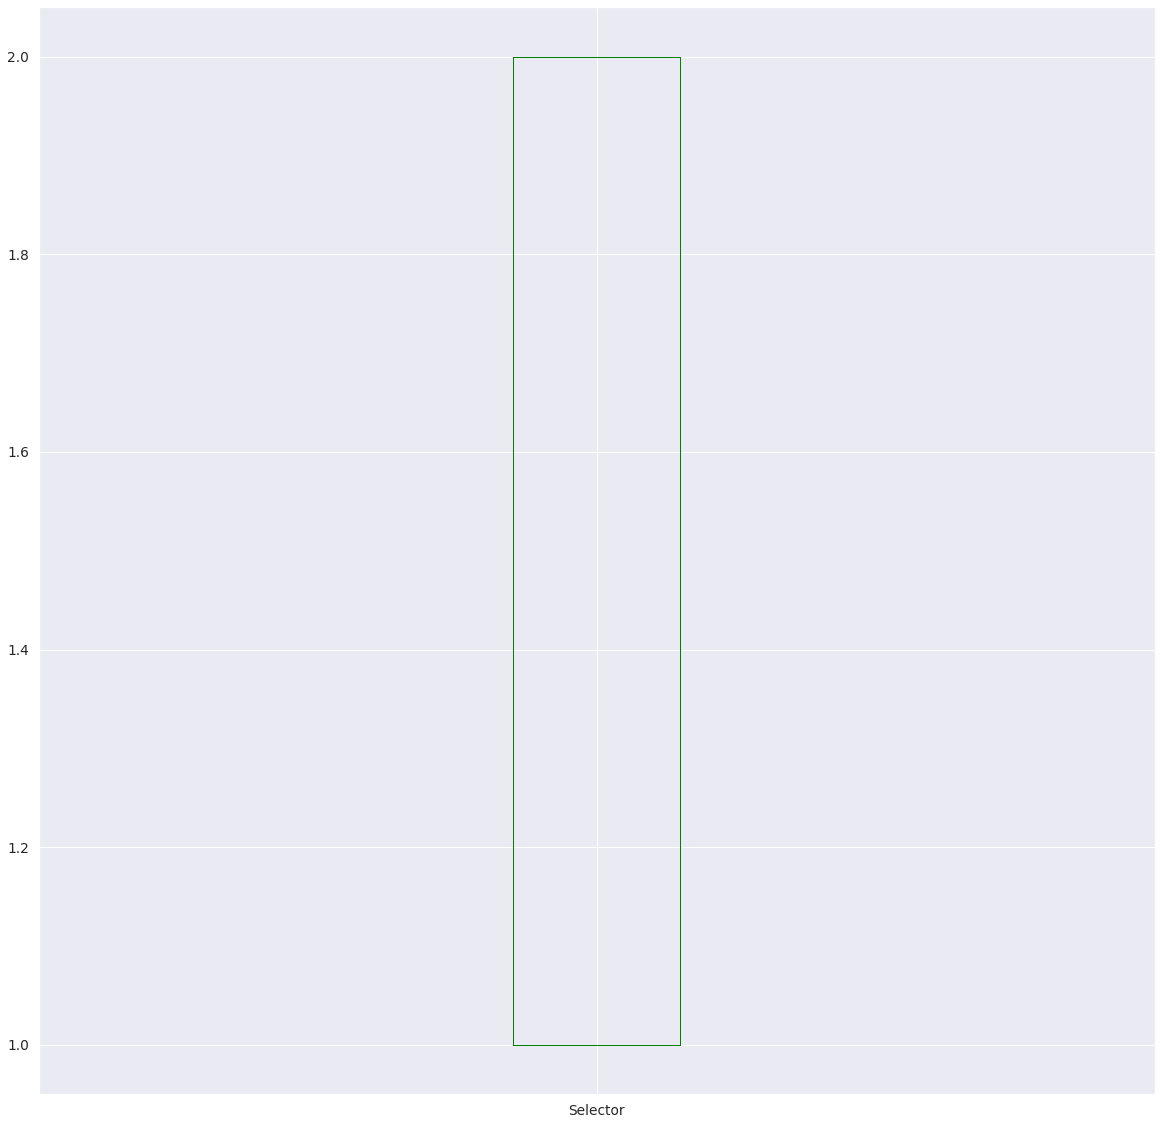

In [11]:
a=df.drop("Gender", axis=1)
for i in numerical:
    df.boxplot([i],color="green",figsize=(20,20))
    plt.show ( )



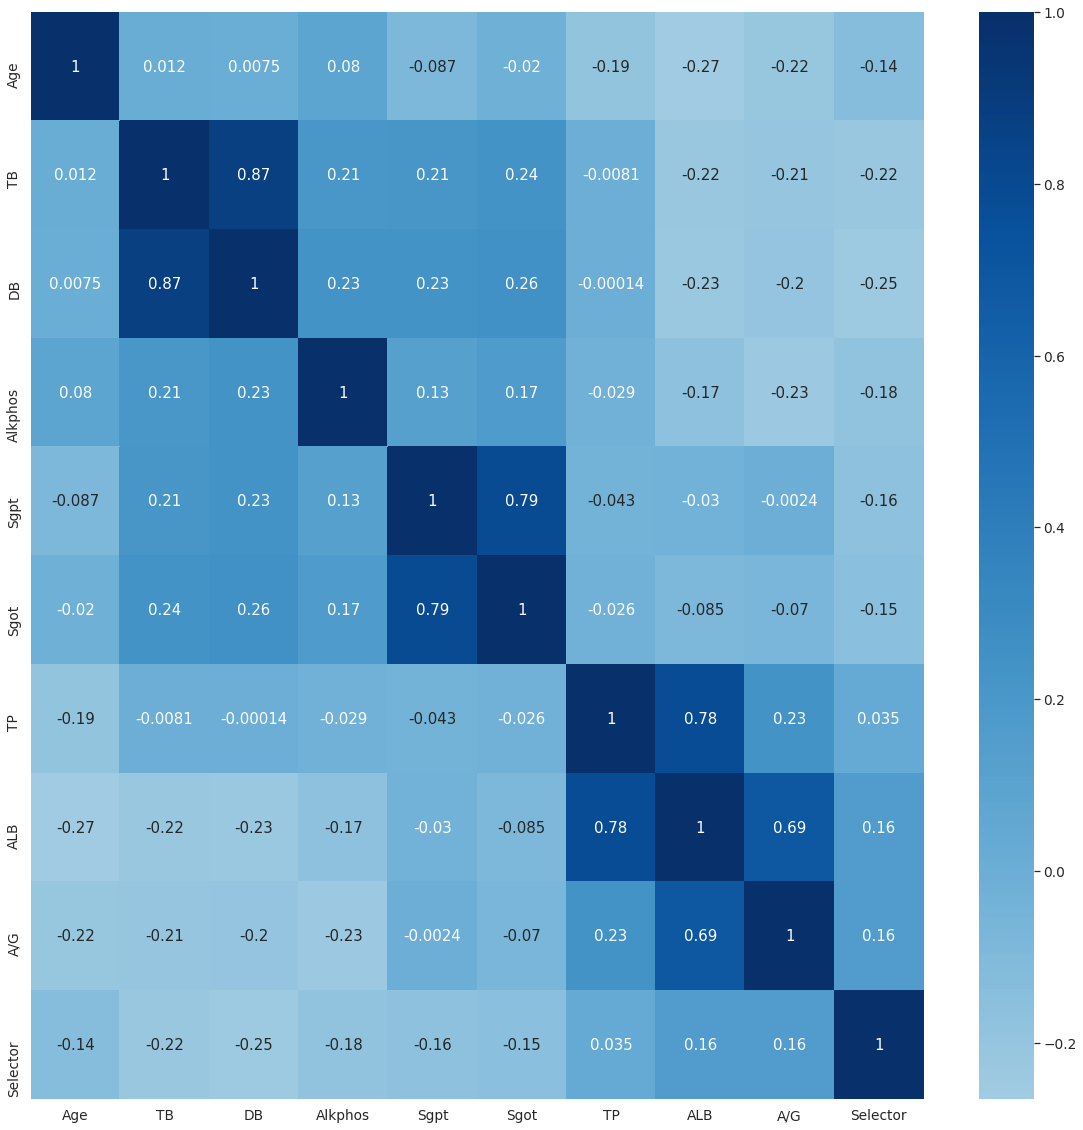

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(df.corr(), center=0, cmap='Blues',annot=True)

In [13]:
observed=pd.crosstab(df["Gender"],df["Selector"],margins=True,normalize=True)
observed

Selector,1,2,All
Gender,,,
Female,0.157804,0.085763,0.243568
Male,0.555746,0.200686,0.756432
All,0.713551,0.286449,1.000000


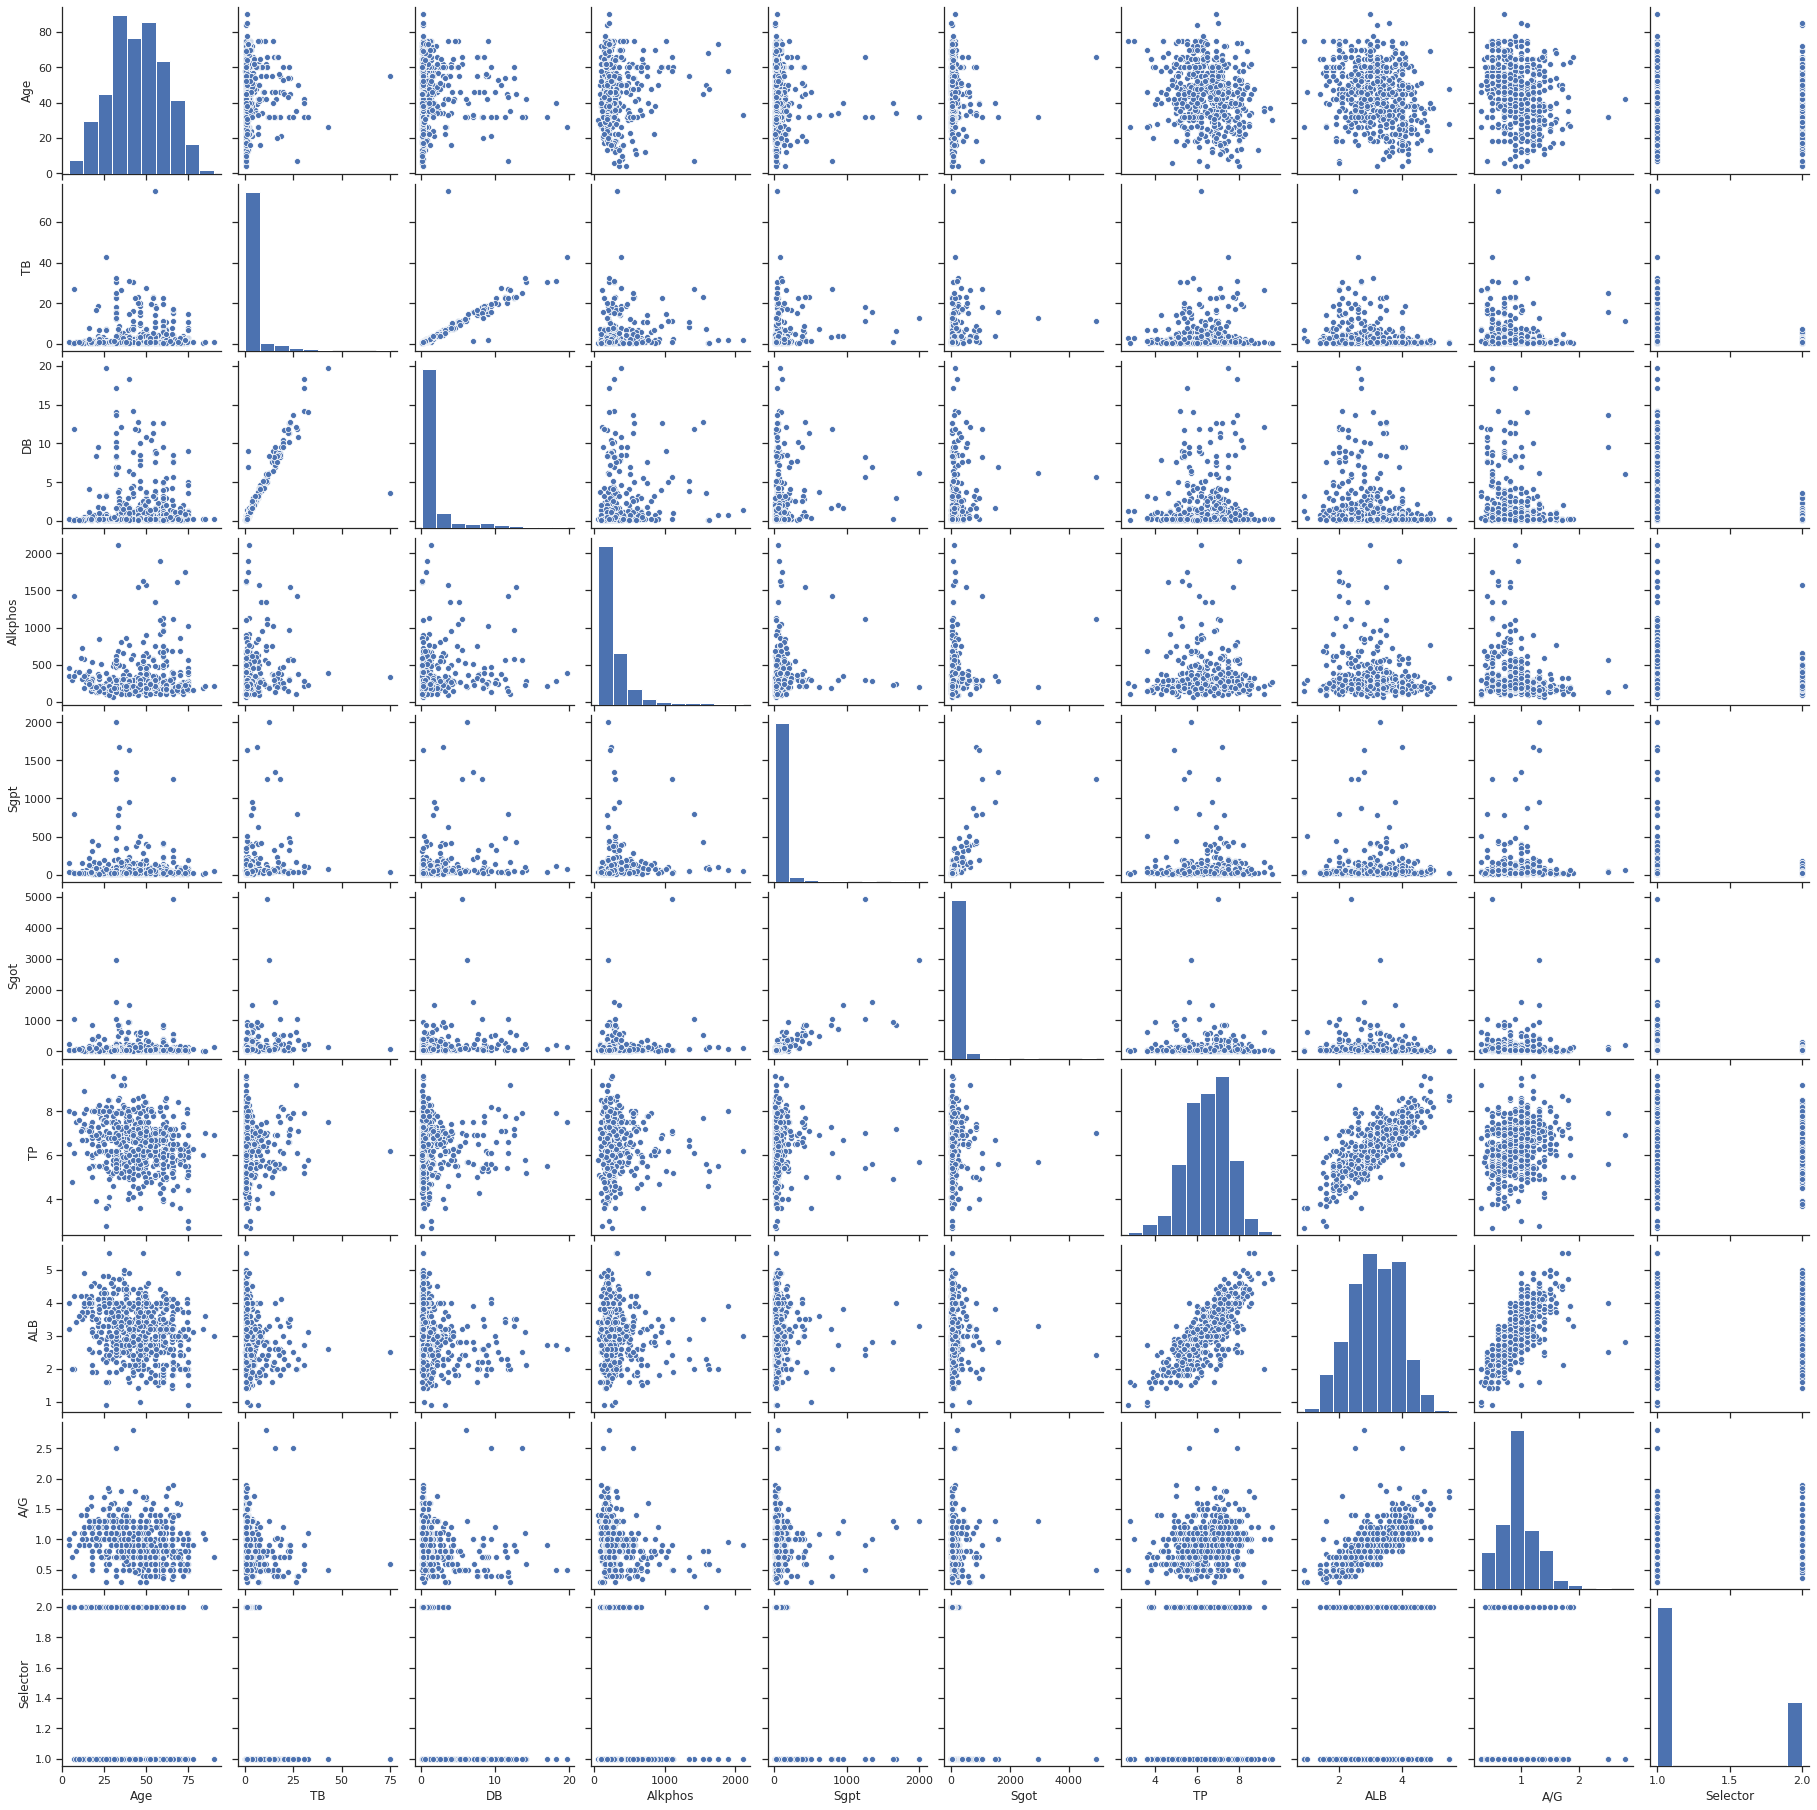

In [14]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(style="ticks",color_codes=True)
sns.pairplot(df)

In [15]:
no = df [ df [ "Selector" ] == 1 ] [ "Age" ]
yes = df [ df [ "Selector" ] == 2 ] [ "Age" ]
print ( shapiro ( df [ "Age" ] ) )
print ( "Since p < 0.05, we reject Ho. Hence, the distribution followed is not normal." )
print ( mannwhitneyu ( no , yes ) )
print ( "Since p < 0.05, we reject Ho. Hence, we can conclude that the age is insignificant." )
print ( "\n" )

ShapiroResult(statistic=0.9921671152114868, pvalue=0.0036761967930942774)
Since p < 0.05, we reject Ho. Hence, the distribution followed is not normal.
MannwhitneyuResult(statistic=28990.5, pvalue=0.0008871841242601723)
Since p < 0.05, we reject Ho. Hence, we can conclude that the age is insignificant.




In [116]:
df.loc[df["Gender"]=="Female","Gender"]=1
df.loc[df["Gender"]=="Male","Gender"]=0

In [117]:
import numpy as np
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

from sklearn.preprocessing import MinMaxScaler

X = df.values
scaler = MinMaxScaler().fit(X)
MinMaxScaler_X = scaler.transform(X)
MinMaxScaler_X

X=MinMaxScaler_X[1:]


clf = make_pipeline(StandardScaler(),
                    SGDClassifier(max_iter=1000, tol=1e-3))
clf.fit(X, Y)


print(clf.predict([[-0.8, -1]]))



array([[0.70930233, 1.        , 0.00402145, ..., 0.52173913, 0.24      ,
        1.        ],
       [0.6744186 , 0.        , 0.14075067, ..., 0.5       , 0.176     ,
        1.        ],
       [0.6744186 , 0.        , 0.0924933 , ..., 0.52173913, 0.236     ,
        1.        ],
       ...,
       [0.55813953, 0.        , 0.00536193, ..., 0.5       , 0.28      ,
        1.        ],
       [0.31395349, 0.        , 0.01206434, ..., 0.54347826, 0.28      ,
        1.        ],
       [0.39534884, 0.        , 0.0080429 , ..., 0.76086957, 0.48      ,
        0.        ]])

In [3]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(feature_cols, df[1], test_size = 0.2, random_state = 7)

print ("Training set has {} samples.".format(X_train.shape[0]))
print ("Testing set has {} samples.".format(X_test.shape[0]))

NameError: name 'feature_cols' is not defined

In [1]:
from sklearn.metrics import fbeta_score, accuracy_score
def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    results = {}

    start = time() # Get start time
    learner.fit(X_train[:sample_size], y_train[:sample_size])
    end = time() # Get end time
    
    results['train_time'] = end - start
        
    start = time() 
    predictions_test = learner.predict(X_test)# predictions on test set
    predictions_train = learner.predict(X_train[:200])# predictions on first 200 elements of training set
    end = time()
    
    results['pred_time'] = end - start
            
    results['acc_train'] = accuracy_score(y_train[:200],predictions_train)
        
    results['acc_test'] = accuracy_score(y_test,predictions_test)
    
    results['f_train'] = fbeta_score(y_train[:200],predictions_train,beta=2)
        
    results['f_test'] = fbeta_score(y_test,predictions_test,beta=2)
       
    print ("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))
        
    return results

In [ ]:



from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
# TODO: Initialize the three models

clf_base = LogisticRegression(random_state=7)
clf_A = RandomForestClassifier(random_state=7)
clf_B = SVC(random_state=7)
clf_C = KNeighborsClassifier()

# TODO: Calculate the number of samples for 20%, 50%, and 100% of the training data
samples_20 = int(len(X_train) * 0.2)
samples_50 = int(len(X_train) * 0.5)
samples_100 = int(len(X_train) )
result_1={}
result_1=train_predict(clf_base, samples, X_train, y_train, X_test, y_test)
print ('Performance metrics for benchmark model (Logistic regression):')
print ('Accuracy score on training subset:%.2f'%result_1['acc_train'])
print ('Accuracy score on test subset:%.2f'%result_1['acc_test'])
print ('F-score on training subset:%.2f'%result_1['f_train'])
print ('F-score on test subset:%.2f'%result_1['f_test'])
# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_20, samples_50, samples_100]):
        results[clf_name][i] = train_predict(clf, samples, X_train, y_train, X_test, y_test)

#vs.evaluate(results, accuracy, fscore)